## Elbow method

In [143]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import pandas as pd
import numpy as np
df = pd.read_csv('../data/country-data.csv')
df = df.drop('country', axis=1)

In [100]:
def elbow_plot(df):
    '''
    This function plots the elbow method for the given dataframes

    Parameters
    ----------
    df1 : pd.DataFrame
        Dataframe to be used for elbow method

    Returns
    -------
    None.
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Elbow Method', fontsize=15)
    K=range(1,10)
    a = []
    b = []
    for i in K:
        kmean=KMeans(n_clusters=i)
        kmean.fit(df1)
        a.append(kmean.inertia_)
        kmean=KMeans(n_clusters=i)
        kmean.fit(df2)
        b.append(kmean.inertia_)
    ax1.plot(K, a, marker='o')
    ax1.set_title('df1', fontsize=15)
    ax1.set_ylabel('Sum of Squared distance', fontsize=15)
    ax2.plot(K, b, marker='o')
    ax2.set_title('df2', fontsize=15)
    fig.supxlabel('Number of clusters', fontsize=15)
    plt.show()

In [132]:
def evaluate_clusters(n_clusters: int, df: pd.DataFrame, df_clusters: pd.Series):
    '''
    This function prints the evaluation metrics for the given dataframes.
    Function has to be scaled before use.
    
    Parameters
    ----------
    n_clusters : int
        Number of clusters used for the clustering
    df1 : pd.DataFrame
        Dataframe to be used for clustering evaluation
    df1_clusters : pd.Series
        Series of clusters for df1
        
    Returns
    -------
    None.
    '''
    print(f'{n_clusters} Clusters')
    print(f'Silhouette Score: {round(silhouette_score(df, df_clusters),3)}')
    print(f'Davies Bouldin Score: {round(davies_bouldin_score(df, df_clusters),3)}')
    print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(df, df_clusters),3)}')
    #print(f'{round(silhouette_score(df, df_clusters),3)}')

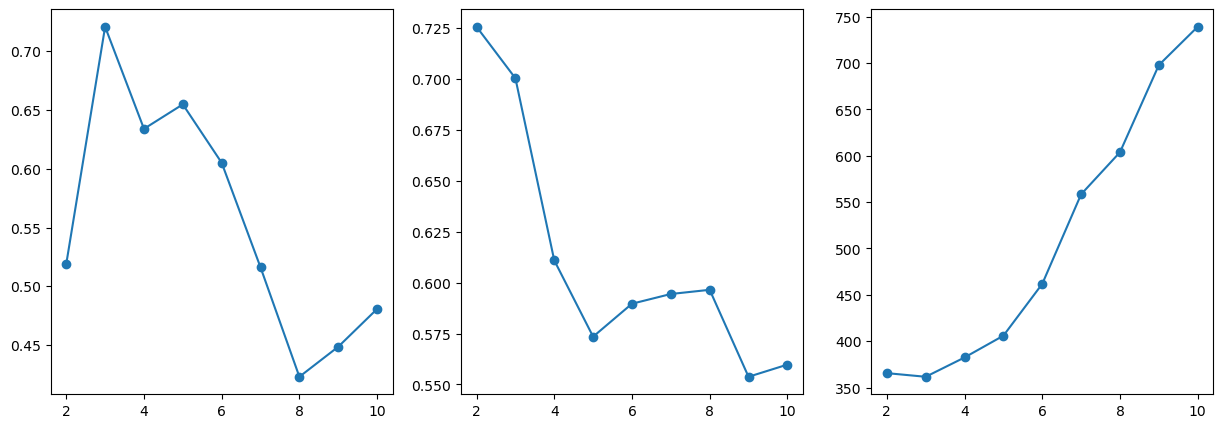

In [133]:
def evaluate_clusters_plot(df: pd.DataFrame):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    resultsa = {}
    resultsb = {}
    resultsc = {}
    resultsd = {}

    for i in range(2,11):
        kmeans = KMeans(n_clusters=i)
        labels = kmeans.fit_predict(df)
        db_index = davies_bouldin_score(df, labels)
        resultsa.update({i: db_index})
        db_index = silhouette_score(df, labels)
        resultsb.update({i: db_index})
        db_index = calinski_harabasz_score(df, labels)
        resultsc.update({i: db_index})


    ax1.plot(list(resultsa.keys()), list(resultsa.values()), marker='o')
    ax2.plot(list(resultsb.keys()), list(resultsb.values()), marker='o')
    ax3.plot(list(resultsc.keys()), list(resultsc.values()), marker='o')

In [131]:
df['clusters'] = KMeans(n_clusters=2).fit_predict(df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])
evaluate_clusters(2, df, df['clusters'])
## gap statistic
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gap_statistic import OptimalK
from gap_statistic import optimalK
from gap_statistic import GapStatistic
from gap_statistic import gap_statistic


2 Clusters
Silhouette Score: 0.726
Davies Bouldin Score: 0.519
Calinski Harabasz Score: 365.569


In [144]:
def gap_statistics(clusterer, data, n_references=5, max_clusters=10):
    # Compute gap statistic for each cluster size
    gaps = []
    for k in range(1, max_clusters + 1):
        # Fit clusterer with current number of clusters
        clusterer.n_clusters = k
        clusterer.fit(data)

        # Compute within-cluster sum of squares (WCSS)
        wcss = 0
        for i in range(k):
            wcss += np.sum((data[clusterer.labels_ == i] - clusterer.cluster_centers_[i]) ** 2)

        # Generate reference distributions
        references = []
        for i in range(n_references):
            # Sample data points uniformly from the dataset
            indices = np.random.choice(range(data.shape[0]), data.shape[0], replace=False)
            sample = data[indices]

            # Fit clusterer with current number of clusters
            clusterer.n_clusters = k
            clusterer.fit(sample)

            # Compute within-cluster sum of squares (WCSS)
            wcss_ref = 0
            for j in range(k):
                wcss_ref += np.sum((sample[clusterer.labels_ == j] - clusterer.cluster_centers_[j]) ** 2)

            # Add reference WCSS to list
            references.append(wcss_ref)

        # Compute gap statistic as mean of log differences between WCSS and reference WCSS
        gaps.append(np.mean([np.log(wcss / wcss_ref) for wcss_ref in references]))

    # Return gap statistic for each cluster size
    return gaps
gap_statistics(KMeans(),df)

KeyError: "None of [Int64Index([ 86,  56,  47,  62, 162,  73,  51, 134,  69,  70,\n            ...\n             28, 107, 132, 149,  88, 103,  77, 130, 119,  60],\n           dtype='int64', length=167)] are in the [columns]"